In [1]:
library(ggplot2)
set.seed(123)

# Inferencia Estadística a partir de la Distribucion de los datos

A partir de este capitulo, se abre camino a una de las fortalezas del lenguaje R. Dejamos este tema hasta este punto por 2 razones:

1. Se deben tener datos previamente procesados y depurados (Modulo 2)
2. Se deben tener conceptos básicos sobre estadística

## Distribucion normal

La **Distribución Normal** es un concepto fundamental en estadística. Gran parte de la estadistica inferencial se basa en el supuesto de las series siguen se encuentran normalmente distribuidas, por lo que lo primero que se debe probar es la distribución de la serie.

# Veamos algunos conceptos:

# Principales funciones para _Distribución Normal_
## dnorm 
retorna la funcion de densidad normal de un vector de datos
## pnorm 
retorna la distribucion acumulada
## qnorm 
retorna la function cuantil
## rnorm 
genera numeros aleatorios que siguen una N($\mu$,$\)

# Como emplear datos normales

Suponga que tiene un dataset con el IQ de personas el cual se distribuye normalmente con media 100 y desviacion estandar 15 y toma una muestra de 100 datos

In [2]:
normal_num<-rnorm(n = 1000,mean = 10,sd = 100)  # Generar una serie con una N(10,100)

In [3]:
sample.range<-seq(50,150)
iq_mean<-100
iq_sd<-15
iq_dist<-dnorm(sample.range,iq_mean,iq_sd)            #Asigna los valores de Z con los parametros para la media y la sd  
df<-data.frame(IQ=sample.range, Densidad = iq_dist)   

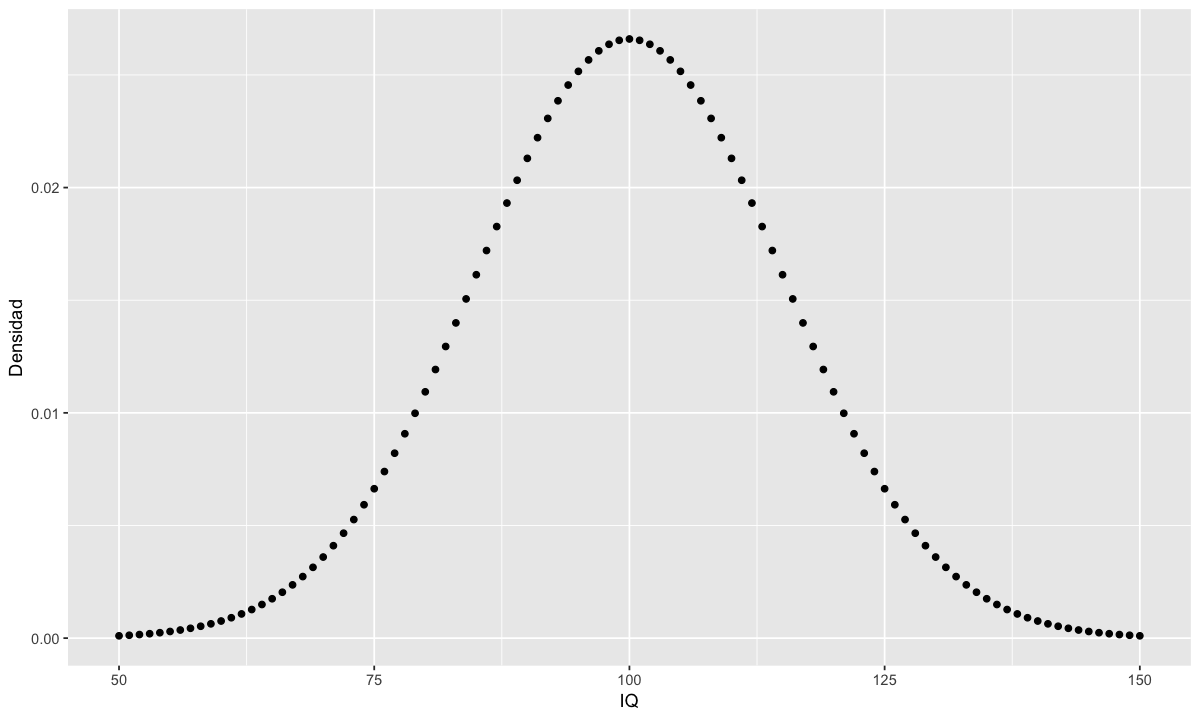

In [4]:
options(repr.plot.width=10, repr.plot.height=6)
ggplot(df,aes(x = IQ,y = Densidad))+geom_point()

Ahora podemos responder preguntas como:

- Cuál es la probabilidad que una persona tenga un IQ mayor o igual a 140
- Cuál es la probabilidad que una persona tenga un IQ menor a 80
- Cuál es la probabilidad que una persona tenga un IQ mayor a 110

In [5]:
paste0('Respuesta 1: ',round(sum(df$Densidad[df$IQ>=140])*100,3),'%')
paste0('Respuesta 2: ',round(sum(df$Densidad[df$IQ<80])*100,3),'%')
paste0('Respuesta 3: ',round(sum(df$Densidad[df$IQ>110])*100,3),'%')


[1] "Respuesta 1: 0.384%"

[1] "Respuesta 2: 8.545%"

[1] "Respuesta 3: 24.154%"

Ahora veamos la funcion $pnorm()$ ===> $P[X<=x]$

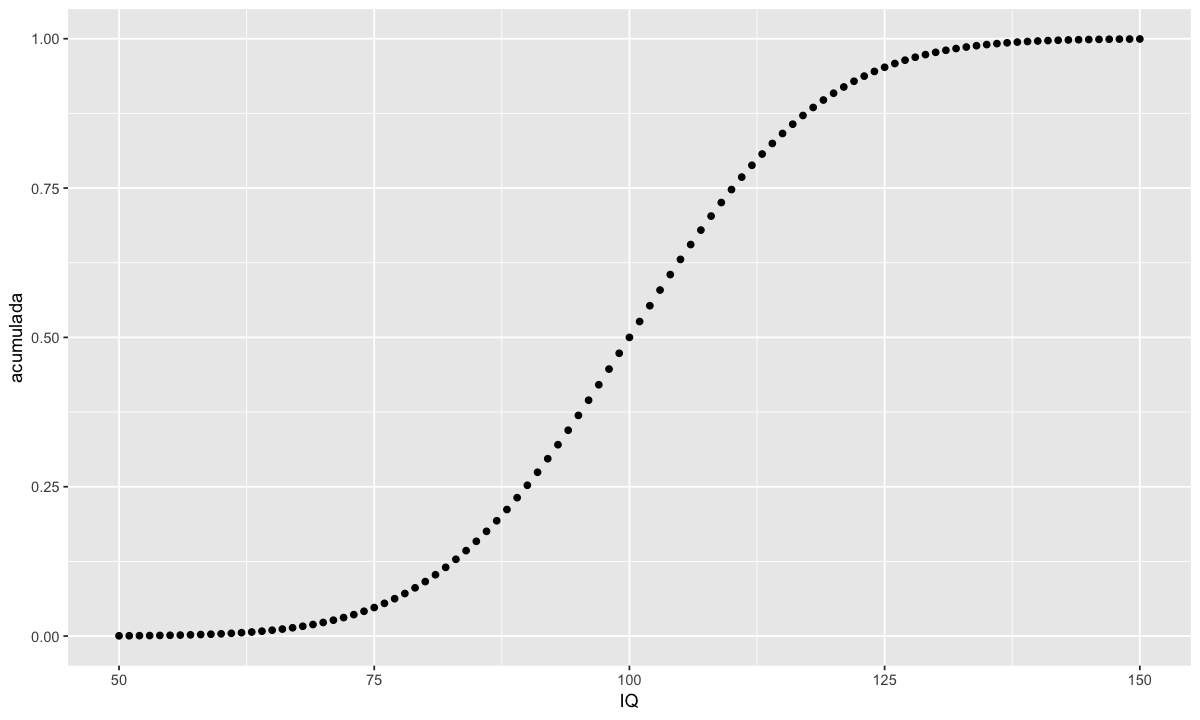

In [6]:
acumulada<-pnorm(sample.range,iq_mean,iq_sd)
df<-cbind(df, acumulada=acumulada)
ggplot(df,aes(x = IQ, y = acumulada))+geom_point()

* Cual es la probabilidad de que un IQ sea menor a 90

In [7]:
paste0('Respuesta: ', round(df$acumulada[df$IQ==90]*100,3), '%')

[1] "Respuesta: 25.249%"

Ahora veamos la funcion $pnorm()$ ===> $P[X>x]$

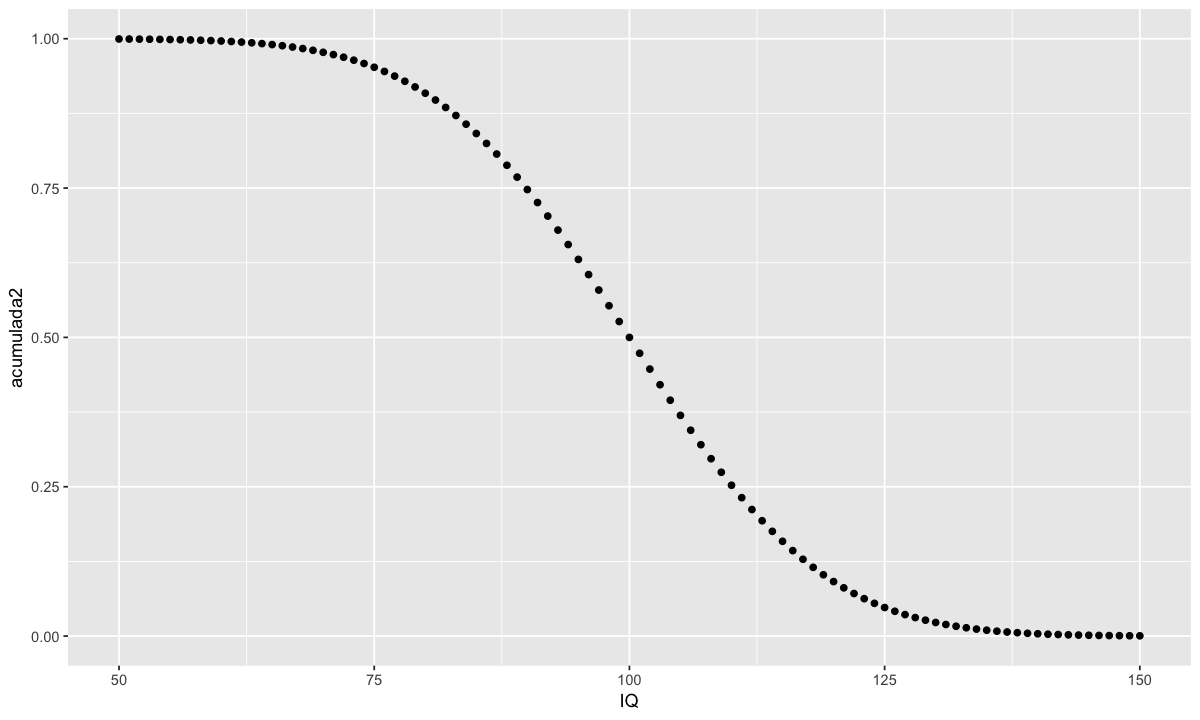

In [8]:
acumulada2<-pnorm(sample.range,iq_mean,iq_sd,lower.tail = FALSE)
df<-cbind(df, acumulada2=acumulada2)
ggplot(df,aes(x = IQ, y = acumulada2))+geom_point()

* Cual es la probabilidad de que un IQ sea mayor o igual a 140

In [9]:
paste0('Respuesta: ',round(df$acumulada2[df$IQ==140]*100,3),'%')

[1] "Respuesta: 0.383%"

Ahora veamos la funcion $qnorm()$ ====> recibe el percentil y devuelve la observacion

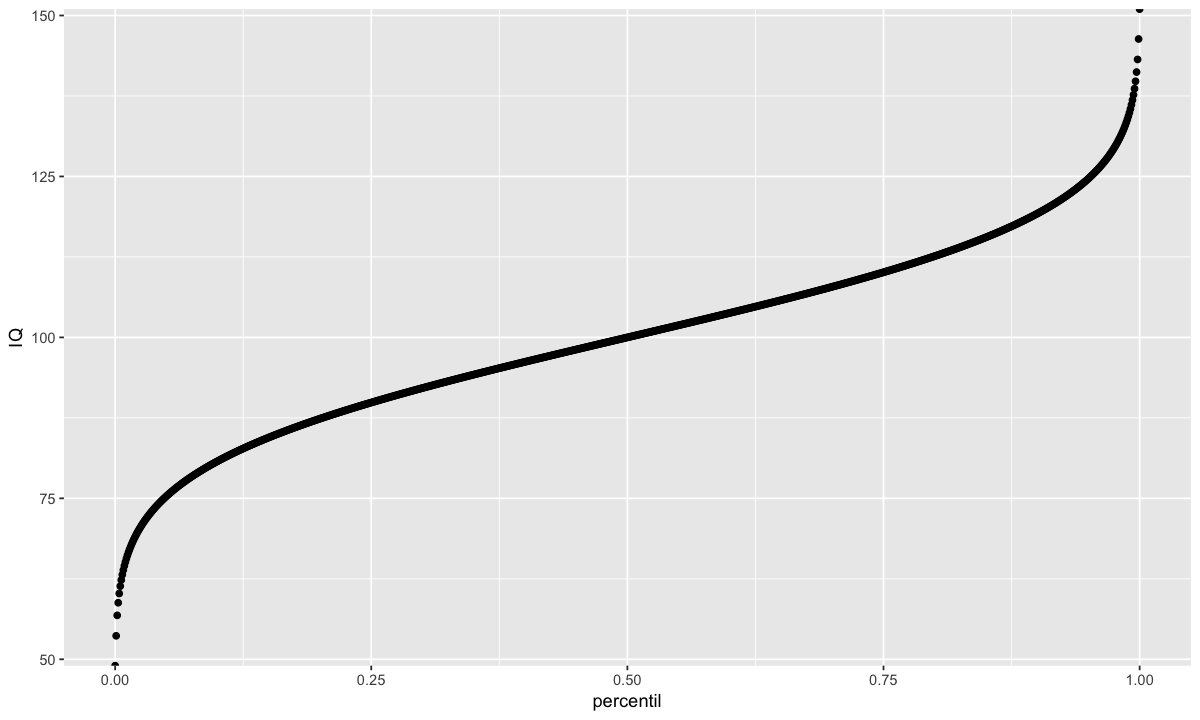

In [10]:
rango_percentil<-seq(0,1,0.001)
p_df<-data.frame(percentil = rango_percentil, IQ=qnorm(p = rango_percentil,mean = iq_mean,sd = iq_sd))

ggplot(p_df,aes(x = percentil,y = IQ))+ geom_point()

In [11]:
as.data.frame(t(quantile(p_df$IQ)))


0%,25%,50%,75%,100%
-Inf,89.88265,100,110.1173,Inf


# Caso de analisis de datos: Dataset Temperatura Castores

Para este ejercicio utilizaremos el dataset precargado en R briever2 el cual contiene la temperatura de 

**HINT:** para consultar sobre el dataset puede utilizar la ayuda de R digitando ?beaver2 en la consola

In [12]:
str(beaver2)   # Estructura del dataset

'data.frame':	100 obs. of  4 variables:
 $ day  : num  307 307 307 307 307 307 307 307 307 307 ...
 $ time : num  930 940 950 1000 1010 1020 1030 1040 1050 1100 ...
 $ temp : num  36.6 36.7 36.9 37.1 37.2 ...
 $ activ: num  0 0 0 0 0 0 0 0 0 0 ...


Se observa que activ es una variable booleana: activ debe ser tipo factor

In [13]:
beaver2$activ<-factor(x = beaver2$activ,levels = c(0,1),labels = c('no','si'))

In [14]:
str(beaver2)

'data.frame':	100 obs. of  4 variables:
 $ day  : num  307 307 307 307 307 307 307 307 307 307 ...
 $ time : num  930 940 950 1000 1010 1020 1030 1040 1050 1100 ...
 $ temp : num  36.6 36.7 36.9 37.1 37.2 ...
 $ activ: Factor w/ 2 levels "no","si": 1 1 1 1 1 1 1 1 1 1 ...


# Debemos verificar si la temperatura sigue una Normal

Para esto podemos hacerlo **Graficamente** o **Mediante pruebas**

## Veamos el método gráfico

1. Graficar el histograma de sobre una muestra
2. Grafico de cuantiles - (QQ-plot)

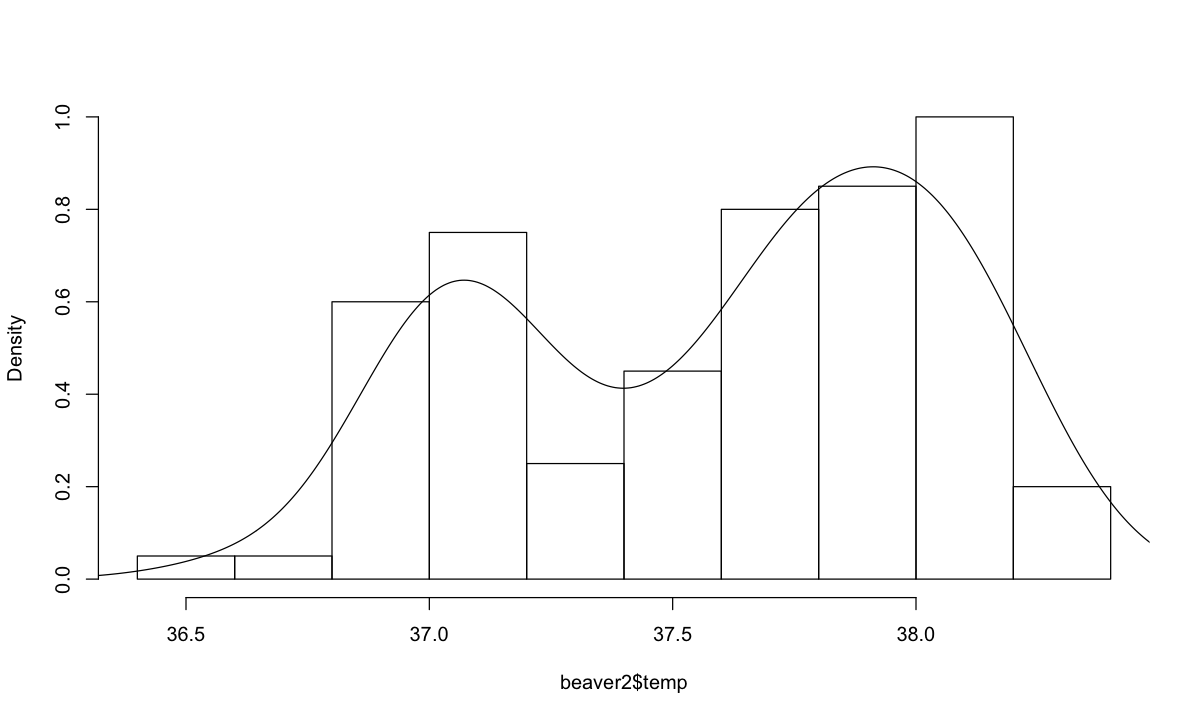

In [19]:
hist(beaver2$temp,freq = FALSE, main = '')
lines(density(beaver2$temp))

In [20]:
library(lattice)

Para conocer más sobre una funcion o paquete puede utilizr la funcion _hepl()_ o más inmediato el simobolo $?$.

Si desea conocer más sobre la libreria que vamos a utilizar, puede ejecutar


$? lattice$


Ahora bien, como tenemos una variable categorica, es interesante observar el comportamiento de poblaciones y compararlas entre sí. empleando formulas se puede obtener el siguiente resultado:


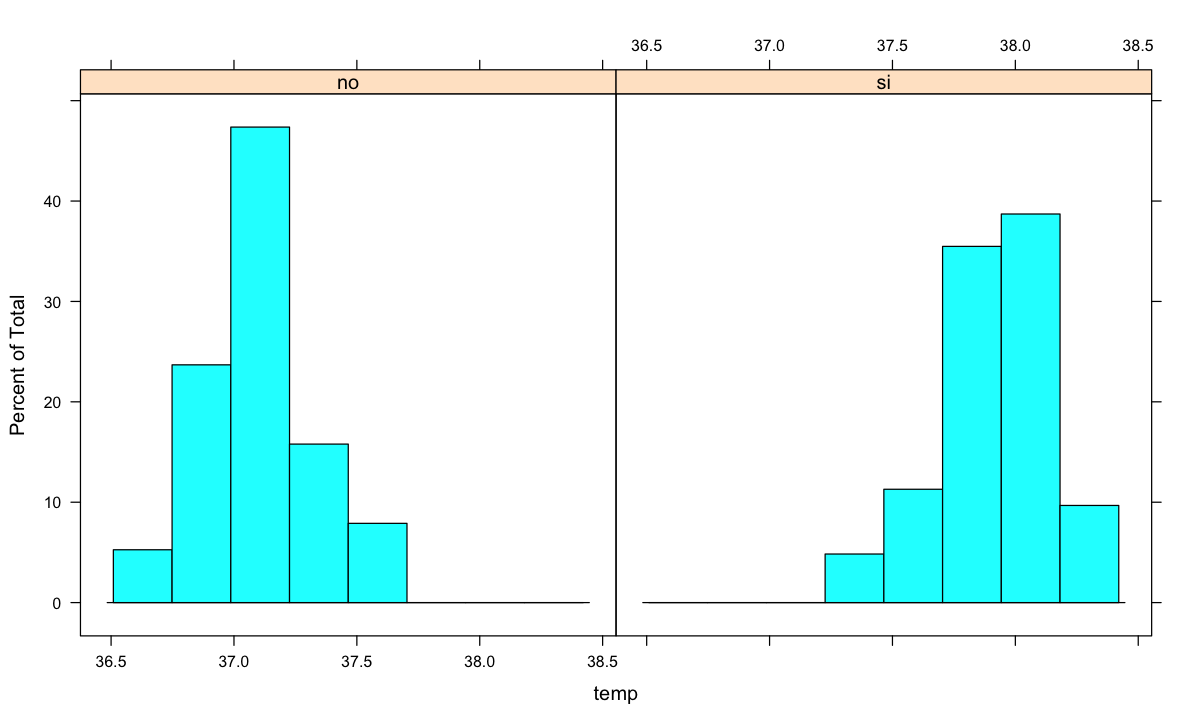

In [27]:
options(repr.plot.width=10, repr.plot.height=6)
histogram(~temp | activ, data = beaver2)

**Notas:** De la anterior implementacion se debe destacar lo siguiente:

* El simbolo ~ debe leerse como **en función de**
* El simbolo | debe leerse como **dada la variable** o **condicionado a**

Gráficamente se puede observar que ambas poblaciones tienden a una distribución Normal ($\mu$, $\sigma^2$).

Este método puede ser muy subjetivo y generar conclusiones basadas en la interpretación del observador.

# QQ-plot

La filosofia de este grafico es graficar los cuantiles entre sí, es decir, se realiza lo siguiente con los datos:

* Se ordenan los datos de las dos muestras a comparar
* Se grafican las dos muestras ordenadas una contra el otro

Si las dos muestras no contienen el mismo numero de datos, R calcula los datos del conjunto con menos datos para crear dos muestras del mismo tamaño.

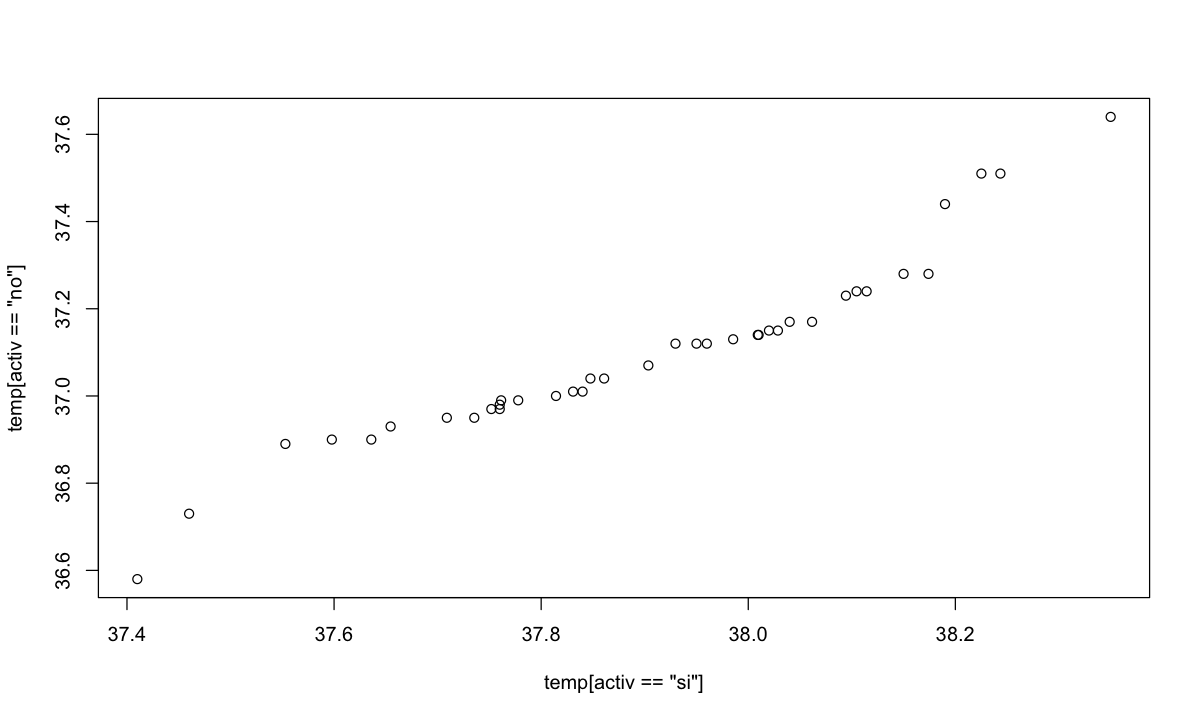

In [32]:
options(repr.plot.width=10, repr.plot.height=6)
with(beaver2,qqplot(temp[activ == "si"], temp[activ == "no"]))

Para revisar la distribución normal de un conjunto de datos utilizando el QQ-plot, se grafica la muestra contra la distribucion teorica. La función implementada en R es $qqnorm()$ donde solo se debe pasar la serie como primer argumento

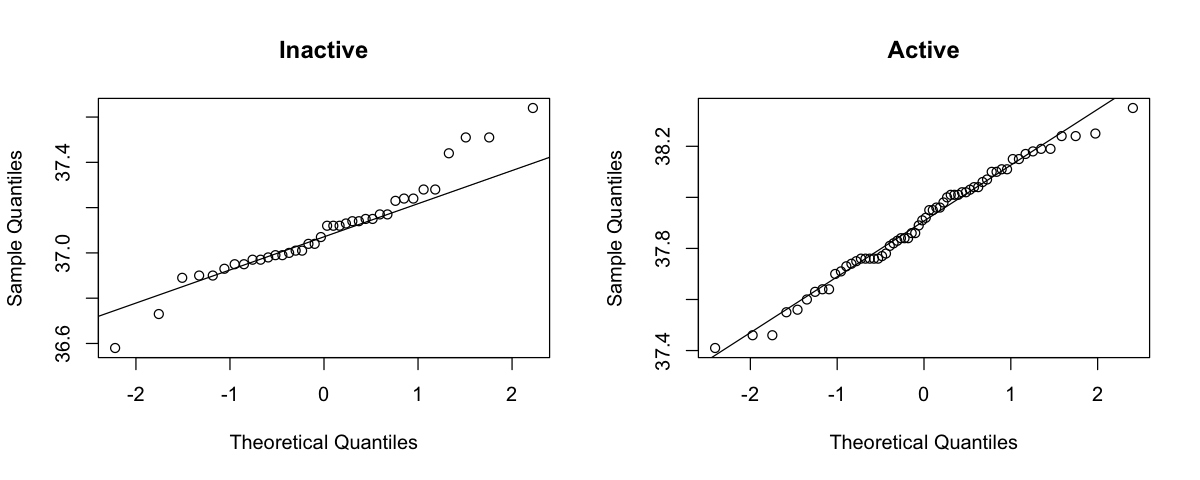

In [37]:
options(repr.plot.width=10, repr.plot.height=4)
par(mfrow=c(1,2))

with(beaver2, {qqnorm(temp[activ == "no"], main = "Inactive")
               qqline(temp[activ == "no"])})

with(beaver2, {qqnorm(temp[activ == "si"], main = "Active")
               qqline(temp[activ == "si"])})

# Prueba de Normalidad (Prueba de Shapiro-Wilks)

$H_0$: La muestra proviene de una población normalmente distribuida

$H_a$: La muestra NO proviene de una población normalmente distribuida

Si valor_p<$\alpha$ se rechaza la hipotesis nula

In [40]:
shapiro.test(x = beaver2$temp)


	Shapiro-Wilk normality test

data:  beaver2$temp
W = 0.93336, p-value = 7.764e-05


**Nota:** En estadistica tambien se suele usar la prueba Kolmogorov-Smirnov para probar normalidad. R tiene implementada la funcion en como $ks.test()$ No obstante, no se ajusta para probar la desviación de los datos con respecto a una Normal. Sirve para comparar otras distribuciones.


Revisar ?ks.test


### Para aplicar la prueba de Shapiro-Wilks a una variable del df para cada grupo de datos especificados por una variable categorica:

In [42]:
with(beaver2,tapply(temp,activ,shapiro.test))

$no

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.95427, p-value = 0.1231


$si

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.98326, p-value = 0.5583



# Comparar dos muestras

En estadistica, comparar grupos es una tarea común, por ejemplo, si se desea saber si un programa de nutrición está siendo efectivo, se divide una población en grupos y se procede a aplicarles el programa, posteriormente, se evaluan los resultados con respecto al grupo de control.

En R contamos con las siguientes pruebas:

* Prueba T $t.test$

    -Nota: Si se desea utilizar la prueba t, primero se debe validar una distribución normal de los datos
    
   
* Prueba Wilcox $wilcox.test$

In [43]:
t.test(temp~activ, data = beaver2)


	Welch Two Sample t-test

data:  temp by activ
t = -18.548, df = 80.852, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8927106 -0.7197342
sample estimates:
mean in group no mean in group si 
        37.09684         37.90306 


# Regresiones lineales